In [1]:
# Import important libraries
import numpy as np
import pandas as pd

# Import important libraries visulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to ignore warnings
import warnings
warnings.filterwarnings

pd.set_option('display.max_columns',None)

# Import libraries for handling categorical data
from sklearn.preprocessing import LabelEncoder

from scipy import stats
from scipy.stats import uniform

# Import libraries to handle scaling
from sklearn.preprocessing import MinMaxScaler

# Libraries to split data into Train and Test Data
from sklearn.model_selection import train_test_split

# Libraries to evaluate model
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,classification_report,f1_score

# Import models algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import RandomizedSearchCV


C:\Users\PRATIK KALE\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import mysql.connector
import pandas as pd

In [3]:
connection = mysql.connector.connect(host='18.136.157.135',
                                    user='dm_team3',
                                    password='DM!$!Team!27@9!20&',
                                    database='project_telecom',
                                    auth_plugin='mysql_native_password')

In [4]:
database = "select * from  telecom_churn_data"
df = pd.read_sql(database,connection)
df

C:\Users\PRATIK KALE\AppData\Local\Temp\ipykernel_19972\1031477393.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(database,connection)


,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,columns11,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


# Basic checks

In [5]:
df.shape

(4617, 21)

In [6]:
df.head()

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,columns11,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [7]:
df.tail()

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,columns11,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.
4616,IN,140,415,409-6884,no,no,0,204.7,100,34.8,126.8,107,10.78,202.8,115,9.13,12.1,4,3.27,2,False.


In [8]:
new_column_names = ['State', 'Account_Length', 'Area_Code', 'Phone',
'International_Plan', 'VMail_Plan', 'VMail_Message',
'Day_Mins', 'Day_Calls', 'Day_Charge',
'Eve_Mins', 'Eve_Calls', 'Eve_Charge',
'Night_Mins', 'Night_Calls', 'Night_Charge',
'International_Mins', 'International_calls',
'International_Charge', 'CustServ_Calls', 'Churn']

In [9]:
df.columns =new_column_names

In [10]:
df

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [11]:
df.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone', 'International_Plan',
       'VMail_Plan', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'International_Mins', 'International_calls',
       'International_Charge', 'CustServ_Calls', 'Churn'],
      dtype='object')

In [12]:
#creating a list except the elements which are catergorical[state,Int_plan,Phone,Vmail_plan,Churn]
list = ['Account_Length', 'Area_Code', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'International_Mins', 'International_calls',
       'International_Charge', 'CustServ_Calls']

#ff['Acc_len']= pd.to_numeric(ff.Acc_len,errors='coerce')

df[list]= df[list].apply(pd.to_numeric,errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account_Length        4617 non-null   int64  
 2   Area_Code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International_Plan    4617 non-null   object 
 5   VMail_Plan            4617 non-null   object 
 6   VMail_Message         4617 non-null   int64  
 7   Day_Mins              4617 non-null   float64
 8   Day_Calls             4617 non-null   int64  
 9   Day_Charge            4617 non-null   float64
 10  Eve_Mins              4617 non-null   float64
 11  Eve_Calls             4617 non-null   int64  
 12  Eve_Charge            4617 non-null   float64
 13  Night_Mins            4617 non-null   float64
 14  Night_Calls           4617 non-null   int64  
 15  Night_Charge         

In [14]:
df.describe(include='O')

,State,Phone,International_Plan,VMail_Plan,Churn
count,4617,4617,4617,4617,4617
unique,51,4617,2,2,2
top,WV,382-4657,no,no,False.
freq,149,1,4171,3381,3961


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account_Length,4617.0,100.645224,39.597194,1.00,74.00,100.00,127.00,243.00
Area_Code,4617.0,437.046350,42.288212,408.00,408.00,415.00,510.00,510.00
VMail_Message,4617.0,7.849903,13.592333,0.00,0.00,0.00,17.00,51.00
Day_Mins,4617.0,180.447152,53.983540,0.00,143.70,180.00,216.80,351.50
Day_Calls,4617.0,100.054364,19.883027,0.00,87.00,100.00,113.00,165.00
Day_Charge,4617.0,30.676576,9.177145,0.00,24.43,30.60,36.86,59.76
Eve_Mins,4617.0,200.429088,50.557001,0.00,165.90,200.80,234.00,363.70
Eve_Calls,4617.0,100.179770,19.821314,0.00,87.00,101.00,114.00,170.00
Eve_Charge,4617.0,17.036703,4.297332,0.00,14.10,17.07,19.89,30.91
Night_Mins,4617.0,200.623933,50.543616,23.20,167.10,200.80,234.90,395.00


# Preprocessing

In [16]:
df.isna().sum()

State                   0
Account_Length          0
Area_Code               0
Phone                   0
International_Plan      0
VMail_Plan              0
VMail_Message           0
Day_Mins                0
Day_Calls               0
Day_Charge              0
Eve_Mins                0
Eve_Calls               0
Eve_Charge              0
Night_Mins              0
Night_Calls             0
Night_Charge            0
International_Mins      0
International_calls     0
International_Charge    0
CustServ_Calls          0
Churn                   0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df.drop('Phone',axis=1,inplace=True)

In [19]:
df_num =df.select_dtypes(include=['float64','int64'])
df_num

,Account_Length,Area_Code,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,57,510,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3
4613,177,408,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3
4614,67,408,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1
4615,98,415,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0


In [20]:
df_cat =df.select_dtypes(include=['object'])
df_cat

,State,International_Plan,VMail_Plan,Churn
0,KS,no,yes,False.
1,OH,no,yes,False.
2,NJ,no,no,False.
3,OH,yes,no,False.
4,OK,yes,no,False.
...,...,...,...,...
4612,NY,no,yes,False.
4613,NM,no,yes,False.
4614,VT,no,yes,False.
4615,MI,no,yes,False.


In [21]:
corr_abs =df_num.corr().abs()
sol =(corr_abs.where(np.triu(np.ones(corr_abs.shape),k=1).astype(np.bool_))
      .stack()
      .sort_values(ascending=False))
sol

Day_Mins            Day_Charge              1.000000
Eve_Mins            Eve_Charge              1.000000
Night_Mins          Night_Charge            0.999999
International_Mins  International_Charge    0.999993
Account_Length      Day_Calls               0.032783
                                              ...   
Eve_Charge          International_Charge    0.000170
Day_Mins            International_calls     0.000166
Eve_Mins            International_Mins      0.000165
Day_Charge          International_calls     0.000163
Eve_Charge          International_Mins      0.000163
Length: 120, dtype: float64

In [22]:
df_num.drop(['VMail_Message','Day_Mins','Eve_Mins','Night_Mins','International_Mins'],axis=1,inplace=True)

In [23]:
df_num

,Account_Length,Area_Code,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,International_calls,International_Charge,CustServ_Calls
0,128,415,110,45.07,99,16.78,91,11.01,3,2.70,1
1,107,415,123,27.47,103,16.62,103,11.45,3,3.70,1
2,137,415,114,41.38,110,10.30,104,7.32,5,3.29,0
3,84,408,71,50.90,88,5.26,89,8.86,7,1.78,2
4,75,415,113,28.34,122,12.61,121,8.41,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...
4612,57,510,81,24.48,112,15.91,122,7.14,6,2.30,3
4613,177,408,91,32.13,96,25.76,116,7.36,1,4.24,3
4614,67,408,126,21.68,129,25.17,91,9.04,3,3.51,1
4615,98,415,98,28.71,117,19.24,96,7.45,3,3.86,0


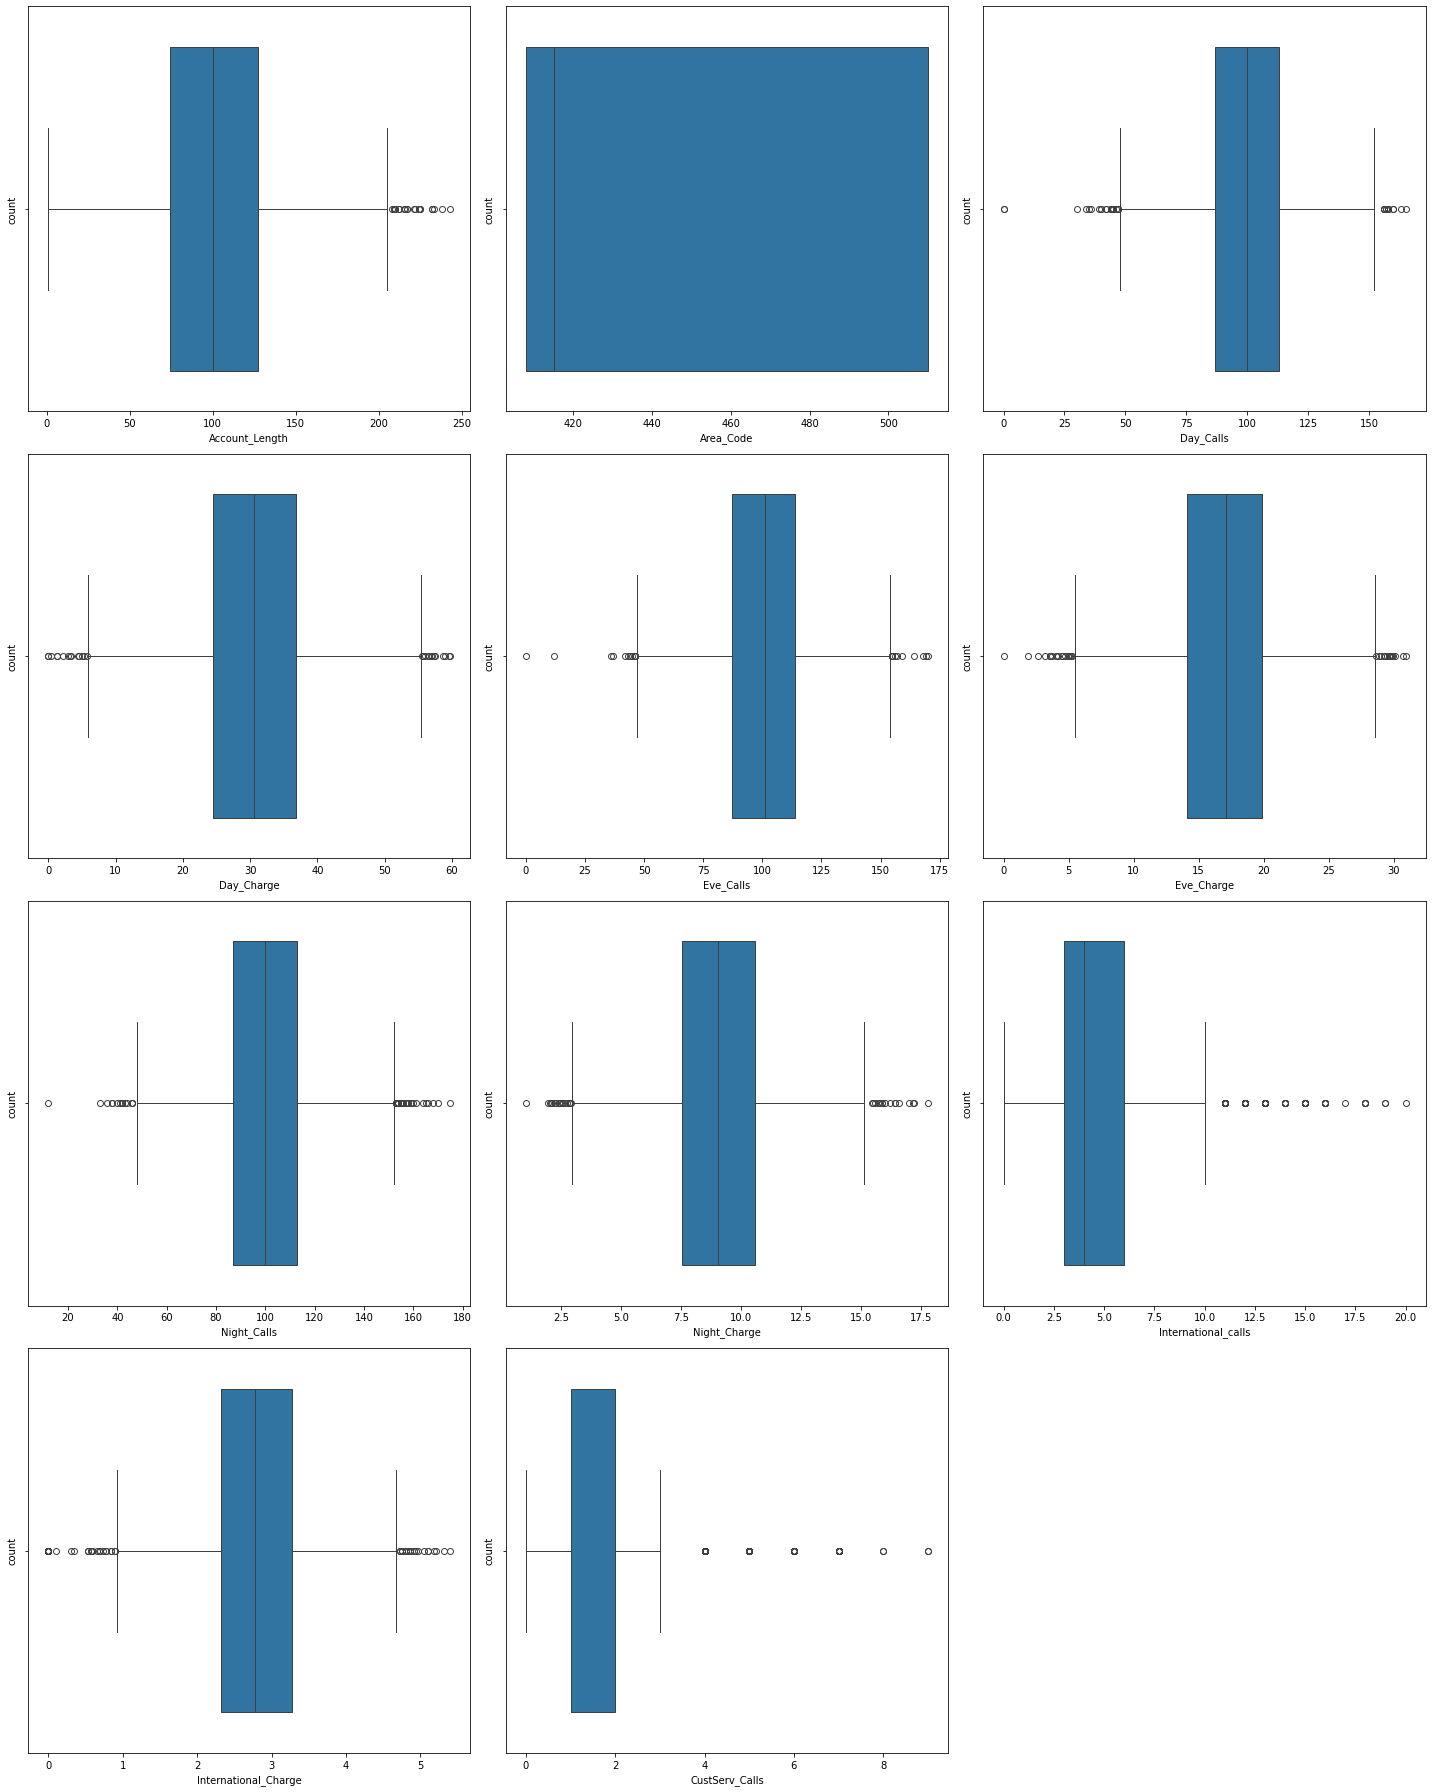

In [24]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in df_num.columns:  # Use data.columns to iterate over column names
    if plotnumber <= 12:
        ax = plt.subplot(4,3, plotnumber)
        sns.boxplot(x=df_num[column])  # Use x=data[column] to specify the column for boxplot
        plt.xlabel(column)
        plt.ylabel('count')
    plotnumber += 1

plt.tight_layout()
plt.show()

In [25]:
from scipy import stats  # Make sure to import the necessary libraries

col = 1
for c in df_num:  # Assuming df1 is your DataFrame
    if col <=12:
        IQR = stats.iqr(df_num[c], interpolation='midpoint')
        print(c, 'IQR:', IQR)
        Q1 = df_num[c].quantile(0.25)
        Q3 = df_num[c].quantile(0.75)
        min_limit = Q1 - 1.5 * IQR
        print(c, 'min_limit:', min_limit)
        max_limit = Q3 + 1.5 * IQR
        print(c, 'max_limit:', max_limit, '\n')

        # Replace outliers with the median
        df_num.loc[(df_num[c] < min_limit) | (df_num[c] > max_limit), c] = np.median(df_num[c])

        # Double-check if outliers are replaced
        replaced_outliers = df_num.loc[(df_num[c] < min_limit) | (df_num[c] > max_limit), c]
        print(f"Replaced outliers in {c}:", replaced_outliers, '\n')
    
    col += 1

Account_Length IQR: 53.0
Account_Length min_limit: -5.5
Account_Length max_limit: 206.5 

Replaced outliers in Account_Length: Series([], Name: Account_Length, dtype: int64) 

Area_Code IQR: 102.0
Area_Code min_limit: 255.0
Area_Code max_limit: 663.0 

Replaced outliers in Area_Code: Series([], Name: Area_Code, dtype: int64) 

Day_Calls IQR: 26.0
Day_Calls min_limit: 48.0
Day_Calls max_limit: 152.0 

Replaced outliers in Day_Calls: Series([], Name: Day_Calls, dtype: int64) 

Day_Charge IQR: 12.43
Day_Charge min_limit: 5.785
Day_Charge max_limit: 55.504999999999995 

Replaced outliers in Day_Charge: Series([], Name: Day_Charge, dtype: float64) 

Eve_Calls IQR: 27.0
Eve_Calls min_limit: 46.5
Eve_Calls max_limit: 154.5 

Replaced outliers in Eve_Calls: Series([], Name: Eve_Calls, dtype: int64) 

Eve_Charge IQR: 5.790000000000001
Eve_Charge min_limit: 5.414999999999997
Eve_Charge max_limit: 28.575000000000003 

Replaced outliers in Eve_Charge: Series([], Name: Eve_Charge, dtype: float64) 


C:\Users\PRATIK KALE\AppData\Local\Temp\ipykernel_19972\3513079753.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  IQR = stats.iqr(df_num[c], interpolation='midpoint')
C:\Users\PRATIK KALE\AppData\Local\Temp\ipykernel_19972\3513079753.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  IQR = stats.iqr(df_num[c], interpolation='midpoint')
C:\Users\PRATIK KALE\AppData\Local\Temp\ipykernel_19972\3513079753.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'hig

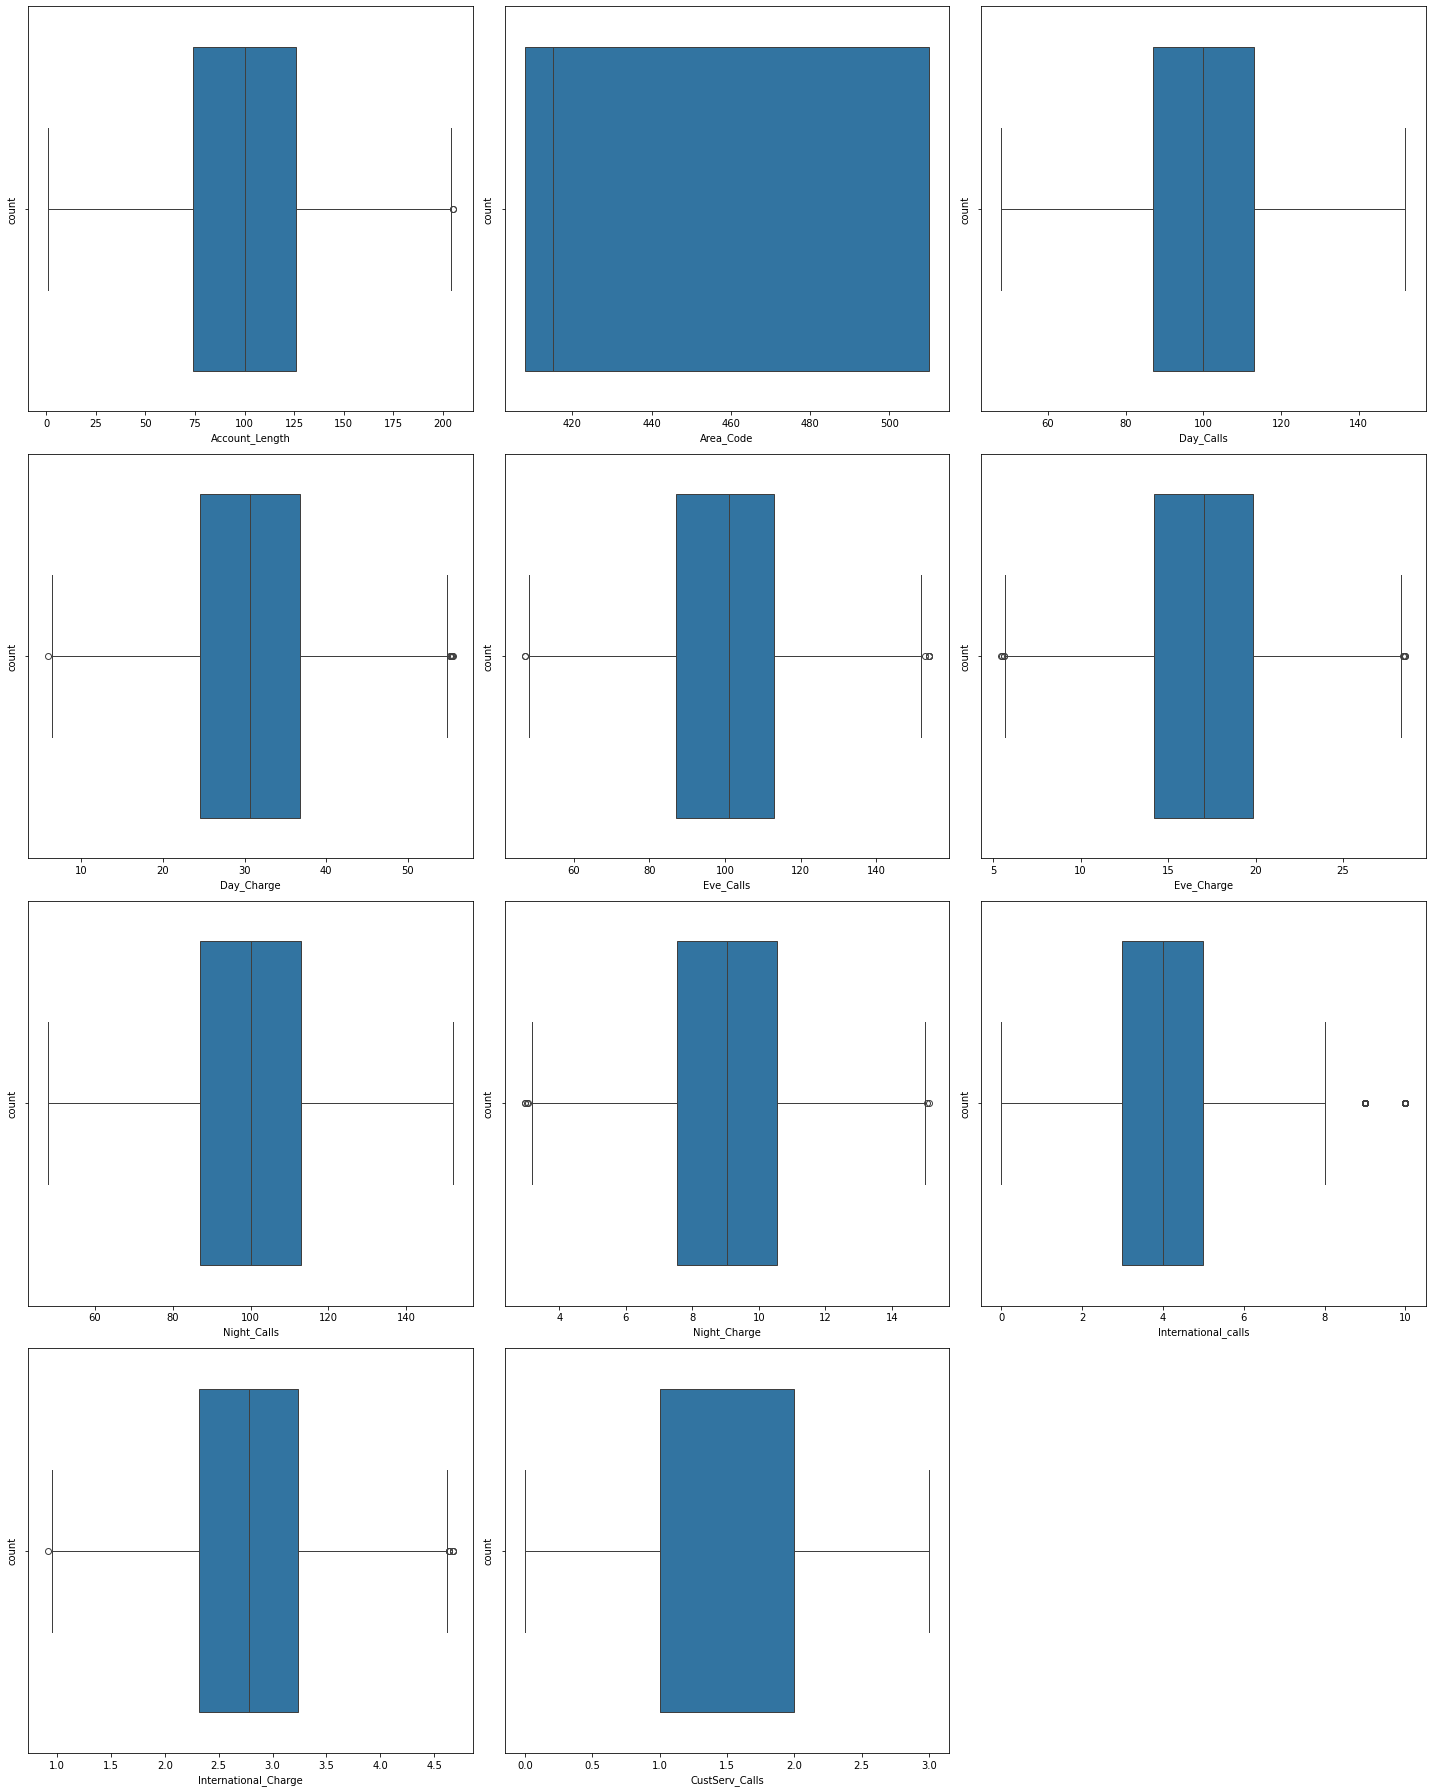

In [26]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in df_num.columns:  # Use data.columns to iterate over column names
    if plotnumber <= 12:
        ax = plt.subplot(4,3, plotnumber)
        sns.boxplot(x=df_num[column])  # Use x=data[column] to specify the column for boxplot
        plt.xlabel(column)
        plt.ylabel('count')
    plotnumber += 1

plt.tight_layout()
plt.show()

In [27]:
df_cat.International_Plan =df_cat.International_Plan.map({' no':0,' yes':1})
df_cat.VMail_Plan =df_cat.VMail_Plan.map({' yes':0,' no':1})
df_cat.Churn =df_cat.Churn.map({' False.':0,' True.':1})

In [28]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

In [29]:
df_cat.State =lc.fit_transform(df_cat.State)

In [30]:
df_cat

,State,International_Plan,VMail_Plan,Churn
0,16,0,0,0
1,35,0,0,0
2,31,0,1,0
3,35,1,1,0
4,36,1,1,0
...,...,...,...,...
4612,34,0,0,0
4613,32,0,0,0
4614,46,0,0,0
4615,22,0,0,0


In [31]:
df1 =pd.concat([df_num,df_cat],axis=1)
df1

,Account_Length,Area_Code,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,International_calls,International_Charge,CustServ_Calls,State,International_Plan,VMail_Plan,Churn
0,128,415,110,45.07,99,16.78,91,11.01,3,2.70,1,16,0,0,0
1,107,415,123,27.47,103,16.62,103,11.45,3,3.70,1,35,0,0,0
2,137,415,114,41.38,110,10.30,104,7.32,5,3.29,0,31,0,1,0
3,84,408,71,50.90,88,17.07,89,8.86,7,1.78,2,35,1,1,0
4,75,415,113,28.34,122,12.61,121,8.41,3,2.73,3,36,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,57,510,81,24.48,112,15.91,122,7.14,6,2.30,3,34,0,0,0
4613,177,408,91,32.13,96,25.76,116,7.36,1,4.24,3,32,0,0,0
4614,67,408,126,21.68,129,25.17,91,9.04,3,3.51,1,46,0,0,0
4615,98,415,98,28.71,117,19.24,96,7.45,3,3.86,0,22,0,0,0


In [32]:
x =df1.drop(["Churn"],axis=1)
y =df1[['Churn']]

In [33]:
sc =MinMaxScaler()
x =sc.fit_transform(x)

In [34]:
y

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
4612,0
4613,0
4614,0
4615,0


In [35]:
y.value_counts()

Churn
0        3961
1         656
Name: count, dtype: int64

In [36]:
from collections import Counter
from imblearn.over_sampling import SMOTE


# Check class distribution before balancing
print("Class distribution before balancing:", Counter(y))

Class distribution before balancing: Counter({'Churn': 1})


In [37]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

# Check class distribution after balancing
print("Class distribution after balancing:", Counter(y_resampled))


Class distribution after balancing: Counter({'Churn': 1})


In [38]:
y_resampled.value_counts()

Churn
0        3961
1        3961
Name: count, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=45)

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6337, 14)
(1585, 14)
(6337, 1)
(1585, 1)


## 1) LogisticRegression

In [41]:
lr =LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\PRATIK KALE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [42]:
# Make predictions on the test data
y_pred_log = lr.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f"Testing Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Testing Accuracy: 0.71
Confusion Matrix:
[[607 217]
 [241 520]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       824
           1       0.71      0.68      0.69       761

    accuracy                           0.71      1585
   macro avg       0.71      0.71      0.71      1585
weighted avg       0.71      0.71      0.71      1585



In [43]:
# Make predictions on the train data
y_train_pred = lr.predict(x_train)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 0.70
Confusion Matrix:
[[2275  862]
 [1048 2152]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.73      0.70      3137
           1       0.71      0.67      0.69      3200

    accuracy                           0.70      6337
   macro avg       0.70      0.70      0.70      6337
weighted avg       0.70      0.70      0.70      6337



## 2) RandomForestClassifier

In [44]:
rf_c =RandomForestClassifier()
rf_c.fit(x_train,y_train)

C:\Users\PRATIK KALE\AppData\Local\Temp\ipykernel_19972\73392775.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_c.fit(x_train,y_train)


RandomForestClassifier()

In [45]:
# Make predictions on the test data
y_pred_log = rf_c.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f"Testing Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Testing Accuracy: 0.96
Confusion Matrix:
[[801  23]
 [ 44 717]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       824
           1       0.97      0.94      0.96       761

    accuracy                           0.96      1585
   macro avg       0.96      0.96      0.96      1585
weighted avg       0.96      0.96      0.96      1585



In [46]:
# Make predictions on the train data
y_train_pred = rf_c.predict(x_train)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 1.00
Confusion Matrix:
[[3137    0]
 [   0 3200]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3137
           1       1.00      1.00      1.00      3200

    accuracy                           1.00      6337
   macro avg       1.00      1.00      1.00      6337
weighted avg       1.00      1.00      1.00      6337



## 3) GradientBoostingClassifier

In [47]:
GB =GradientBoostingClassifier()
GB.fit(x_train,y_train)

C:\Users\PRATIK KALE\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [48]:
# Make predictions on the test data
y_pred_log = GB.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f"Testing Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Testing Accuracy: 0.91
Confusion Matrix:
[[800  24]
 [114 647]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       824
           1       0.96      0.85      0.90       761

    accuracy                           0.91      1585
   macro avg       0.92      0.91      0.91      1585
weighted avg       0.92      0.91      0.91      1585



In [49]:
# Make predictions on the train data
y_train_pred = GB.predict(x_train)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 0.92
Confusion Matrix:
[[3064   73]
 [ 455 2745]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      3137
           1       0.97      0.86      0.91      3200

    accuracy                           0.92      6337
   macro avg       0.92      0.92      0.92      6337
weighted avg       0.92      0.92      0.92      6337



## 4) AdaBoostClassifier

In [50]:
AB =AdaBoostClassifier()
AB.fit(x_train,y_train)

C:\Users\PRATIK KALE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [51]:
# Make predictions on the test data
y_pred_log = AB.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f"Testing Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Testing Accuracy: 0.82
Confusion Matrix:
[[693 131]
 [149 612]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       824
           1       0.82      0.80      0.81       761

    accuracy                           0.82      1585
   macro avg       0.82      0.82      0.82      1585
weighted avg       0.82      0.82      0.82      1585



In [52]:
# Make predictions on the train data
y_train_pred = AB.predict(x_train)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 0.83
Confusion Matrix:
[[2687  450]
 [ 596 2604]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      3137
           1       0.85      0.81      0.83      3200

    accuracy                           0.83      6337
   macro avg       0.84      0.84      0.83      6337
weighted avg       0.84      0.83      0.83      6337



## 5) XGBClassifier

In [53]:
XGB =XGBClassifier()
XGB.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [54]:
# Make predictions on the test data
y_pred_log = XGB.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f"Testing Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Testing Accuracy: 0.96
Confusion Matrix:
[[804  20]
 [ 50 711]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       824
           1       0.97      0.93      0.95       761

    accuracy                           0.96      1585
   macro avg       0.96      0.96      0.96      1585
weighted avg       0.96      0.96      0.96      1585



In [55]:
# Make predictions on the train data
y_train_pred = XGB.predict(x_train)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 1.00
Confusion Matrix:
[[3136    1]
 [   2 3198]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3137
           1       1.00      1.00      1.00      3200

    accuracy                           1.00      6337
   macro avg       1.00      1.00      1.00      6337
weighted avg       1.00      1.00      1.00      6337



## SVC

In [56]:
svc = SVC()
svc.fit(x_train, y_train)

C:\Users\PRATIK KALE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [57]:
# Make predictions on the test data
y_pred_log = svc.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f"Testing Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Testing Accuracy: 0.82
Confusion Matrix:
[[695 129]
 [152 609]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       824
           1       0.83      0.80      0.81       761

    accuracy                           0.82      1585
   macro avg       0.82      0.82      0.82      1585
weighted avg       0.82      0.82      0.82      1585



In [58]:
# Make predictions on the train data
y_train_pred = svc.predict(x_train)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 0.85
Confusion Matrix:
[[2702  435]
 [ 524 2676]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      3137
           1       0.86      0.84      0.85      3200

    accuracy                           0.85      6337
   macro avg       0.85      0.85      0.85      6337
weighted avg       0.85      0.85      0.85      6337

